<a href="https://colab.research.google.com/github/Curslo/data-science/blob/main/Employee_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Capstone Project: Employee Attrition & Retention Analysis

---

##  Student Information
- **Name**: *Christine Kavithe*
- **Project Title**: Employee Attrition & Retention Analysis
- **Dataset**: [IBM HR Analytics Attrition Dataset](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)
- **Date**: April 2025

---

##  1. Problem Statement

Employee attrition is a major concern in most organizations. The goal of this project is to:
- Analyze employee-related data to discover patterns linked to attrition.
- Build a machine learning model to predict if an employee is likely to leave the company.
- Recommend strategies to reduce attrition and improve employee retention.

---

##  2. Import Libraries

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns```


```rom sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix```

#Import LabelEncoder
```from sklearn.preprocessing import LabelEncoder```

In [11]:
# Install Kaggle API
!pip install kaggle

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

#Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

---
##📥 3. Upload the API key
``from google.colab import files
uploaded = files.upload()
``

In [2]:
from google.colab import files
uploaded = files.upload()


Saving kaggle.json to kaggle.json


---
## 📥 4. Save the API key and test it.


``!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
 ``

 ---
 ``!kaggle datasets list -s titanic ``

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets list -s titanic

ref                                  title                                                size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------  ---------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
heptapod/titanic                     Titanic                                             11090  2017-05-16 08:14:22.210000         108631       1572  0.7058824        
brendan45774/test-file               Titanic dataset                                     11514  2021-12-02 16:11:42.367000         169668       1337  1.0              
yasserh/titanic-dataset              Titanic Dataset                                     22564  2021-12-24 14:53:06.913000         133112        436  1.0              
azeembootwala/titanic                Titanic                                             12406  2017-06-05 12:14:37.477000          23529        197  0.8235294 

---
## 5. Upload the dataset file

```from google.colab import files
uploaded = files.upload() ```

In [7]:
from google.colab import files
uploaded = files.upload()


Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


---
## 📥 6. Load and Preview the Dataset

```df = pd.read_csv('/path-to-your-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')```
---
```df.head()```

In [8]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


---
## 🔍 7. Explore the Dataset (EDA)
```python
df.info()
df.describe()
df.isnull().sum()```

# Visuals
```sns.countplot(x='Attrition', data=df)
plt.title('Employee Attrition Count')
plt.show()```

# More EDA
```sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)```

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

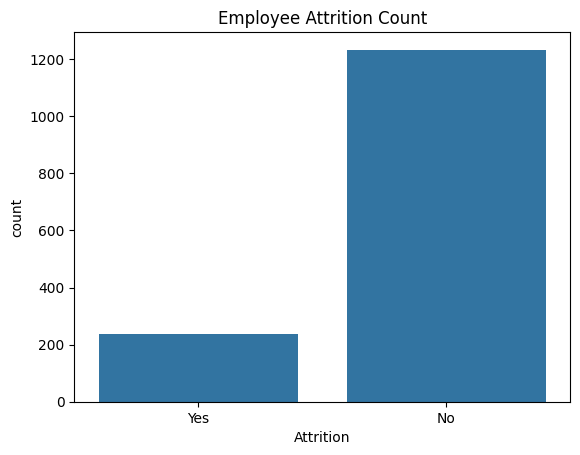

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

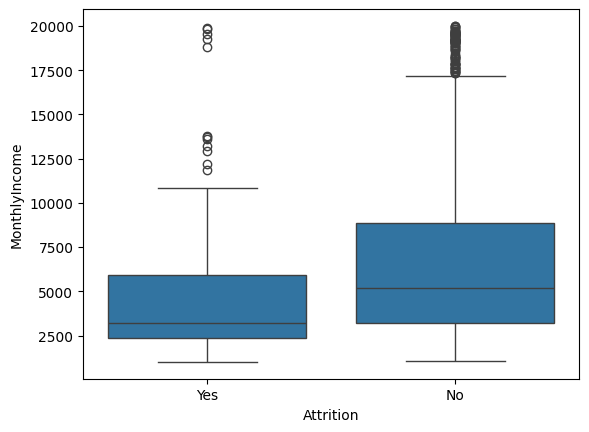

In [9]:
df.info()
df.describe()
df.isnull().sum()

# Visuals
sns.countplot(x='Attrition', data=df)
plt.title('Employee Attrition Count')
plt.show()

# More EDA
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)

## 🧼 8. Data Cleaning and Preprocessing

# Convert categorical columns to numeric
```le = LabelEncoder() for col in df.select_dtypes(include=['object']).columns: df[col] = le.fit_transform(df[col])```

```df.head()```

In [12]:
# Convert categorical columns to numeric
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


---
## 🧠 9. Model Building

# Define features and target
```X = df.drop(['Attrition'], axis=1)```

```y = df['Attrition']```

# Train-test split
```X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)```

# Random Forest
```model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)```

# Evaluation
```print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))```

In [13]:
# Define features and target
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[253   2]
 [ 35   4]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294



---
##📈 10. Visualize Results

```importances = model.feature_importances_
feat_names = X.columns
feat_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)```

# Plot top features
```plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(10))
plt.title('Top 10 Important Features for Attrition Prediction')```

Text(0.5, 1.0, 'Top 10 Important Features for Attrition Prediction')

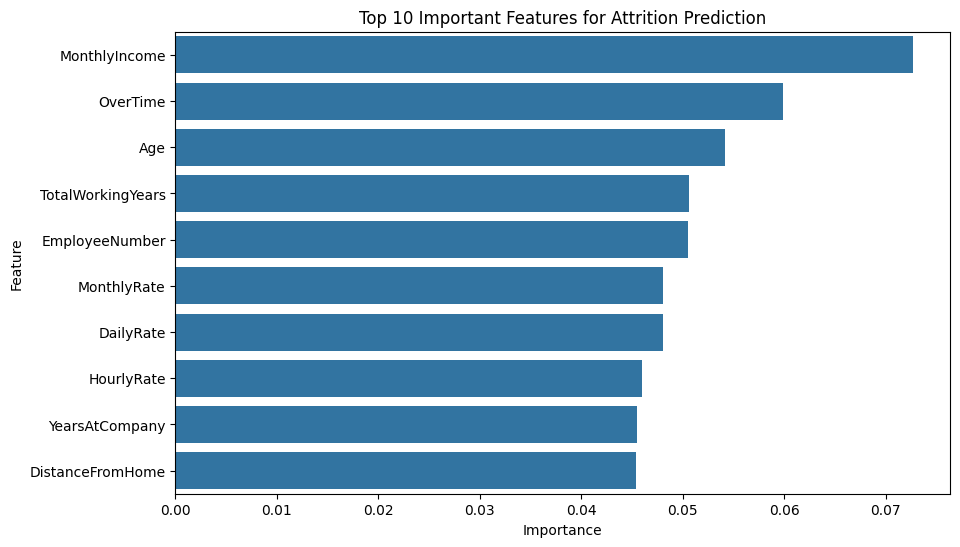

In [14]:
importances = model.feature_importances_
feat_names = X.columns
feat_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot top features
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(10))
plt.title('Top 10 Important Features for Attrition Prediction')

---
##🧾 11. Summary and Recommendations
Summary:

Key factors influencing attrition include: OverTime, MonthlyIncome, JobRole, Age, and DistanceFromHome.

The model predicts attrition with decent accuracy using Random Forest.

Recommendations:

Monitor employees with high overtime.

Consider reviewing job satisfaction and compensation strategies.